In [ ]:
!pip install world_bank_data --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=9b178c838c485e9720117d49bb779b136f35efa52fdadb37a58d99ddfa7487e0
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [ ]:
import os
import json
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

import world_bank_data as wb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
wi_df = pd.read_csv('/content/drive/MyDrive/Northeastern/Projects/IE6600 Final Project/World Bank Selected Indicators.xlsx - Sheet1.csv')
wi_df

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
indicators = list(wi_df['Indicator Code'].dropna())
indicators

['NY.GDP.MKTP.KD.ZG',
 'GC.XPN.INTP.CN',
 'GC.XPN.TOTL.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'NY.GDP.MKTP.CD',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNS.ICTR.ZS',
 'NY.GDP.DEFL.KD.ZG',
 'GC.XPN.INTP.ZS',
 'SL.UEM.TOTL.ZS',
 'FP.CPI.TOTL.ZG',
 'BX.KLT.DINV.CD.WD',
 'FR.INR.LNDP',
 'FR.INR.LEND',
 'FM.LBL.BMNY.GD.ZS',
 'CM.MKT.LCAP.GD.ZS',
 'FS.AST.PRVT.GD.ZS',
 'FS.AST.DOMS.GD.ZS',
 'CM.MKT.TRAD.GD.ZS',
 'NE.EXP.GNFS.ZS',
 'NE.IMP.GNFS.ZS',
 'SL.TLF.ACTI.ZS',
 'IC.TAX.LABR.CP.ZS',
 'EN.ATM.CO2E.PC',
 'EG.ELC.RNWX.ZS',
 'SH.STA.SMSS.ZS',
 'AG.PRD.FOOD.XD',
 'AG.LND.FRST.ZS',
 'FS.AST.PRVT.GD.ZS',
 'TG.VAL.TOTL.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'GC.XPN.TOTL.GD.ZS',
 'MS.MIL.XPND.GD.ZS',
 'GC.AST.TOTL.GD.ZS',
 'GC.LBL.TOTL.GD.ZS',
 'GC.NFN.TOTL.GD.ZS',
 'GC.NLD.TOTL.GD.ZS',
 'GC.REV.XGRT.GD.ZS',
 'GC.TAX.TOTL.GD.ZS',
 'GB.XPD.RSDV.GD.ZS',
 'TG.VAL.TOTL.GD.ZS',
 'SE.XPD.TOTL.GD.ZS',
 'SE.XPD.PRIM.PC.ZS',
 'SE.XPD.SECO.PC.ZS',
 'SE.XPD.TERT.PC.ZS',
 'NY.GDP.TOTL.RT.ZS',
 'DT.DOD.DECT.GN.ZS',
 

In [ ]:
pcap = pd.DataFrame(wb.get_series('SL.GDP.PCAP.EM.KD', date='1990:2022', id_or_value='id', simplify_index=True))
pcap

SL.GDP.PCAP.EM.KD
Country Year                   
AFE     1990                NaN
        1991        8244.518639
        1992        7850.405134
        1993        7582.666373
        1994        7486.980479
...                         ...
ZWE     2017        5228.429113
        2018        5388.118118
        2019        4969.081523
        2020        4652.733381
        2021        4775.607588

[8512 rows x 1 columns]

In [ ]:
data = pd.DataFrame()
for ind in indicators:
  data2 = wb.get_series(ind, date='1990:2020', id_or_value='id', simplify_index=True)
  data = pd.concat([data, data2], axis=1)

In [ ]:
data

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AFE 1990          -0.039677             NaN                NaN   
    1991           0.105301             NaN                NaN   
    1992          -1.979118             NaN                NaN   
    1993          -0.392300             NaN                NaN   
    1994           2.025857             NaN                NaN   
...                     ...             ...                ...   
ZWE 2016           0.755869     142501584.0          25.236347   
    2017           4.709492     229797540.0          28.413719   
    2018           4.824211     761307154.0          20.697183   
    2019          -6.144236             NaN                NaN   
    2020          -6.248748             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AFE 1990                NaN    2.532240e+11  ...    59.305126   
    1991                NaN    2.734028e+11  ...    53.933170   
    1992                NaN    2.382554e+11  ...    53.950285   
    1993                NaN    2.365269e+11  ...    56.196562   
    1994                NaN    2.401201e+11  ...    61.210240   
...                     ...             ...  ...          ...   
ZWE 2016                NaN    2.054868e+10  ...    95.000000   
    2017                NaN    1.758489e+10  ...    90.000000   
    2018                NaN    1.811554e+10  ...    88.000000   
    2019                NaN    1.928429e+10  ...    85.000000   
    2020                NaN    1.805117e+10  ...    85.000000   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
AFE 1990          51.430660          51.430660     120062718.0     156682481.0  
    1991          51.477748          51.477748     123616494.0     161328531.0  
    1992          51.587893          51.587893     127344638.0     166252340.0  
    1993          51.746670          51.746670     131230462.0     171418905.0  
    1994          51.937393          51.937393     135250938.0     176784467.0  
...                     ...                ...             ...             ...  
ZWE 2016          54.473134          54.473134       6802164.0       7642765.0  
    2017          54.505941          54.505941       6909356.0       7759792.0  
    2018          54.659410          54.659410       7028775.0       7892169.0  
    2019          54.861265          54.861265       7156060.0       8034692.0  
    2020          55.074722          55.074722       7204228.0       8185716.0  

[8246 rows x 101 columns]

**Regions**

In [ ]:
wb.get_regions().iloc[0:10]

,code,iso2code,name
id,,,
,AFE,ZH,Africa Eastern and Southern
,AFR,A9,Africa
,AFW,ZI,Africa Western and Central
,ARB,1A,Arab World
,CAA,C9,Sub-Saharan Africa (IFC classification)
,CEA,C4,East Asia and the Pacific (IFC classification)
,CEB,B8,Central Europe and the Baltics
,CEU,C5,Europe and Central Asia (IFC classification)
,CLA,C6,Latin America and the Caribbean (IFC classific...


In [ ]:
wb.get_regions().iloc[10:20]

,code,iso2code,name
id,,,
,CSA,C8,South Asia (IFC classification)
,CSS,S3,Caribbean small states
,EAP,4E,East Asia & Pacific (excluding high income)
,EAR,V2,Early-demographic dividend
1,EAS,Z4,East Asia & Pacific
,ECA,7E,Europe & Central Asia (excluding high income)
2,ECS,Z7,Europe & Central Asia
,EMU,XC,Euro area
,EUU,EU,European Union


In [ ]:
wb.get_regions().iloc[20:30]

,code,iso2code,name
id,,,
,HPC,XE,Heavily indebted poor countries (HIPC)
,LAC,XJ,Latin America & Caribbean (excluding high income)
3,LCN,ZJ,Latin America & Caribbean
,LDC,XL,Least developed countries: UN classification
,LTE,V3,Late-demographic dividend
,MDE,M1,Middle East (developing only)
4,MEA,ZQ,Middle East & North Africa
,MNA,XQ,Middle East & North Africa (excluding high inc...
6,NAC,XU,North America


In [ ]:
wb.get_regions().iloc[30:40]

,code,iso2code,name
id,,,
,NRS,6X,Non-resource rich Sub-Saharan Africa countries
,OED,OE,OECD members
,OSS,S4,Other small states
,PRE,V1,Pre-demographic dividend
,PSS,S2,Pacific island small states
,PST,V4,Post-demographic dividend
,RRS,R6,Resource rich Sub-Saharan Africa countries
8,SAS,8S,South Asia
,SSA,ZF,Sub-Saharan Africa (excluding high income)


In [ ]:
wb.get_regions().tail(4)

,code,iso2code,name
id,,,
,SST,S1,Small states
,SXZ,A4,Sub-Saharan Africa excluding South Africa
,WLD,1W,World
,XZN,A5,Sub-Saharan Africa excluding South Africa and ...


In [ ]:
Major_Regions = ['EAS', 'ECS','NAC','SAS','MEA', 'LCN', 'EUU']
region = wb.get_regions()
region

,code,iso2code,name
id,,,
,AFE,ZH,Africa Eastern and Southern
,AFR,A9,Africa
,AFW,ZI,Africa Western and Central
,ARB,1A,Arab World
,CAA,C9,Sub-Saharan Africa (IFC classification)
...,...,...,...
9,SSF,ZG,Sub-Saharan Africa
,SST,S1,Small states
,SXZ,A4,Sub-Saharan Africa excluding South Africa


**Selected Major Regions**

In [ ]:
mr_df = region.loc[region['code'].isin(Major_Regions)]
mr_df

,code,iso2code,name
id,,,
1,EAS,Z4,East Asia & Pacific
2,ECS,Z7,Europe & Central Asia
,EUU,EU,European Union
3,LCN,ZJ,Latin America & Caribbean
4,MEA,ZQ,Middle East & North Africa
6,NAC,XU,North America
8,SAS,8S,South Asia


In [ ]:
mr_code = list(mr_df['code'])
mr_code

['EAS', 'ECS', 'EUU', 'LCN', 'MEA', 'NAC', 'SAS']

In [ ]:
datamr = data.loc[['EAS', 'ECS', 'EUU', 'LCN', 'MEA', 'NAC', 'SAS'],:,:]
datamr

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
EAS 1990           5.073856             NaN                NaN   
    1991           4.852352             NaN                NaN   
    1992           4.239459             NaN                NaN   
    1993           4.204069             NaN                NaN   
    1994           5.242282             NaN                NaN   
...                     ...             ...                ...   
SAS 2016           7.671464             NaN          14.969130   
    2017           6.444783             NaN          15.228649   
    2018           6.373259             NaN          15.084180   
    2019           3.913844             NaN                NaN   
    2020          -5.239833             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
EAS 1990                NaN    4.737130e+12  ...    89.443706   
    1991                NaN    5.348104e+12  ...    86.002801   
    1992                NaN    5.843647e+12  ...    82.309655   
    1993                NaN    6.534963e+12  ...    78.760137   
    1994                NaN    7.402443e+12  ...    76.086656   
...                     ...             ...  ...          ...   
SAS 2016          47.680245    3.005244e+12  ...    85.911757   
    2017          47.630590    3.426791e+12  ...    87.651222   
    2018          46.570323    3.527313e+12  ...    90.331850   
    2019                NaN    3.648732e+12  ...    91.801738   
    2020                NaN    3.482474e+12  ...    87.934961   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
EAS 1990          64.541138          64.541138    9.567345e+08    1.175914e+09  
    1991          64.636212          64.636212    9.709855e+08    1.194534e+09  
    1992          64.879720          64.879720    9.873982e+08    1.214870e+09  
    1993          65.189117          65.189117    1.002630e+09    1.235991e+09  
    1994          65.459612          65.459612    1.019934e+09    1.256427e+09  
...                     ...                ...             ...             ...  
SAS 2016          65.206465          65.206465    6.341835e+08    1.154929e+09  
    2017          65.489050          65.489050    6.422090e+08    1.174142e+09  
    2018          65.743078          65.743078    6.469488e+08    1.192879e+09  
    2019          65.999231          65.999231    6.598482e+08    1.211599e+09  
    2020          66.268692          66.268692    6.321568e+08    1.230532e+09  

[217 rows x 101 columns]

**Visualize Mising values In Raw Data 1990-2020**

<Figure size 2160x1296 with 0 Axes>

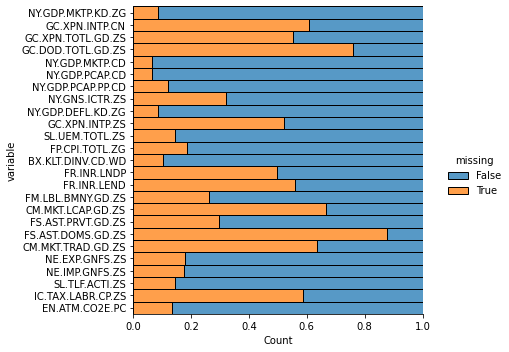

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data.iloc[:,0:25].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

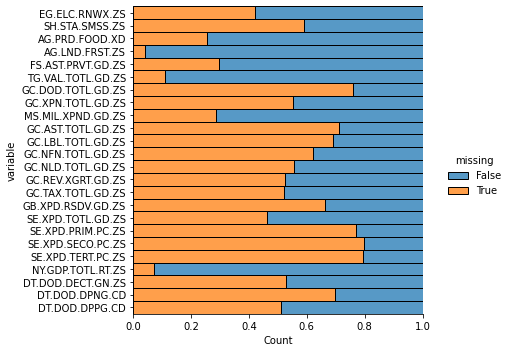

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data.iloc[:,25:50].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

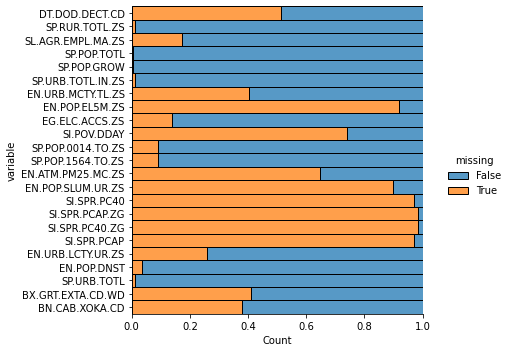

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data.iloc[:,50:75].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

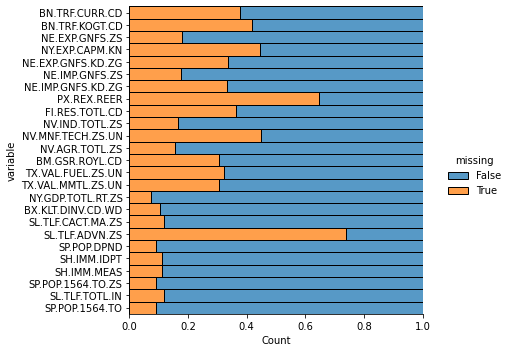

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data.iloc[:,75:].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
def calculate_quality(data,rate):
  not_good_list = []
  for i in range(data.shape[1]):
    if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:
      #print(f'{data.columns[i]}:{(sum(data.iloc[:,i].isna())/len(data.iloc[:,i]))}')
      not_good_list.append(data.columns[i])
  print(f'There are {len(not_good_list)} columns with missing value rate larger than {100*rate}%')
  return not_good_list

**Visualize Mising values In 7 Countries Data 1990-2020**

In [ ]:
data7c = data.loc[['USA','CHN','JPN','DEU','GBR','IND','FRA'],:,:]
c7 = ['USA','CHN','JPN','DEU','GBR','IND','FRA']

<Figure size 2160x1296 with 0 Axes>

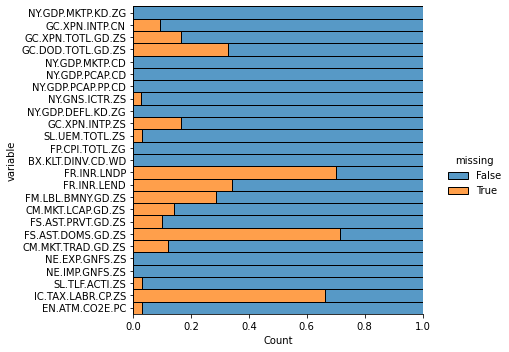

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data7c.iloc[:,0:25].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

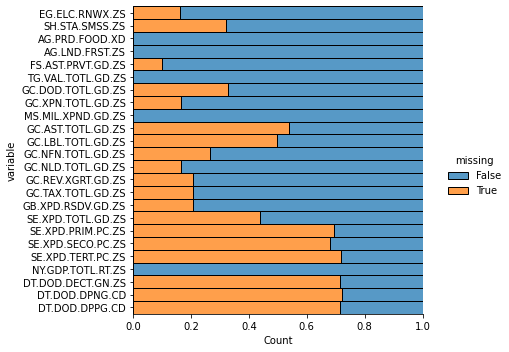

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data7c.iloc[:,25:50].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

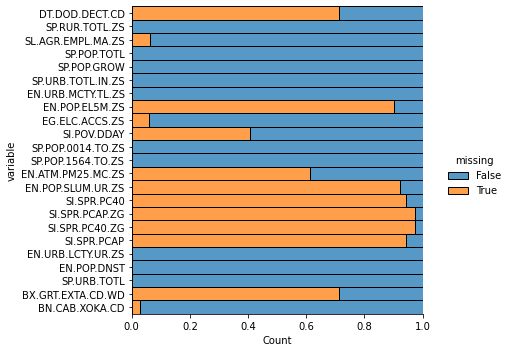

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data7c.iloc[:,50:75].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

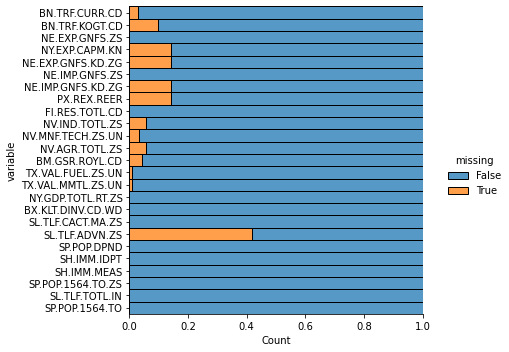

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data7c.iloc[:,75:].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

**Drop Indicators with more than 20% missing values (7Countries)**

In [ ]:
drop_list_country= calculate_quality(data7c ,0.2)

There are 33 columns with missing value rate larger than 20.0%


In [ ]:
drop_list_country

['GC.DOD.TOTL.GD.ZS',
 'FR.INR.LNDP',
 'FR.INR.LEND',
 'FM.LBL.BMNY.GD.ZS',
 'FS.AST.DOMS.GD.ZS',
 'IC.TAX.LABR.CP.ZS',
 'SH.STA.SMSS.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'GC.AST.TOTL.GD.ZS',
 'GC.LBL.TOTL.GD.ZS',
 'GC.NFN.TOTL.GD.ZS',
 'GC.REV.XGRT.GD.ZS',
 'GC.TAX.TOTL.GD.ZS',
 'GB.XPD.RSDV.GD.ZS',
 'SE.XPD.TOTL.GD.ZS',
 'SE.XPD.PRIM.PC.ZS',
 'SE.XPD.SECO.PC.ZS',
 'SE.XPD.TERT.PC.ZS',
 'DT.DOD.DECT.GN.ZS',
 'DT.DOD.DPNG.CD',
 'DT.DOD.DPPG.CD',
 'DT.DOD.DECT.CD',
 'EN.POP.EL5M.ZS',
 'SI.POV.DDAY',
 'EN.ATM.PM25.MC.ZS',
 'EN.POP.EL5M.ZS',
 'EN.POP.SLUM.UR.ZS',
 'SI.SPR.PC40',
 'SI.SPR.PCAP.ZG',
 'SI.SPR.PC40.ZG',
 'SI.SPR.PCAP',
 'BX.GRT.EXTA.CD.WD',
 'SL.TLF.ADVN.ZS']

In [ ]:
data7c_d = data7c.drop(drop_list_country, axis=1)
na_columns = data7c_d.columns[data7c_d.isnull().any()]

<Figure size 2160x1296 with 0 Axes>

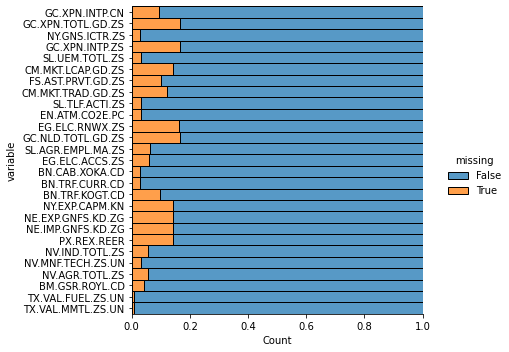

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=data7c_d.loc[:,na_columns].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
data7c_d

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
USA 1990           1.885965    1.963400e+11          21.558929   
    1991          -0.108265    2.189500e+11          22.884386   
    1992           3.522441    2.165600e+11          21.818384   
    1993           2.751781    2.109900e+11          21.417473   
    1994           4.028793    2.143200e+11          20.731454   
...                     ...             ...                ...   
FRA 2016           1.095464    4.055100e+10          47.881926   
    2017           2.291420    3.920100e+10          47.707991   
    2018           1.865066    3.959400e+10          46.773207   
    2019           1.842972    3.439900e+10          46.302461   
    2020          -7.855256    2.909400e+10          52.083279   

          NY.GDP.MKTP.CD  NY.GDP.PCAP.CD  ...  SH.IMM.MEAS  SP.POP.1564.TO.ZS  \
USA 1990    5.963144e+12    23888.600009  ...         90.0          65.697718   
    1991    6.158129e+12    24342.258905  ...         87.0          65.528463   
    1992    6.520327e+12    25418.990776  ...         83.0          65.394699   
    1993    6.858559e+12    26387.293734  ...         84.0          65.308229   
    1994    7.287236e+12    27694.853416  ...         89.0          65.283182   
...                  ...             ...  ...          ...                ...   
FRA 2016    2.472964e+12    37062.533572  ...         90.0          62.470344   
    2017    2.595151e+12    38781.049487  ...         90.0          62.221177   
    2018    2.790957e+12    41592.795896  ...         90.0          62.008911   
    2019    2.728870e+12    40578.644285  ...         92.0          61.806472   
    2020    2.630318e+12    39037.122631  ...         92.0          61.592889   

          SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
USA 1990          65.697718     127976617.0     163996615.0  
    1991          65.528463     128888505.0     165774560.0  
    1992          65.394699     131111933.0     167746558.0  
    1993          65.308229     132441929.0     169748497.0  
    1994          65.283182     134712595.0     171777026.0  
...                     ...             ...             ...  
FRA 2016          62.470344      30449775.0      41682778.0  
    2017          62.221177      30490320.0      41637179.0  
    2018          62.008911      30620365.0      41609176.0  
    2019          61.806472      30551690.0      41564189.0  
    2020          61.592889      30255910.0      41501232.0  

[217 rows x 68 columns]

In [ ]:
for c in c7:
  data7c_d_i = data7c_d.interpolate()

In [ ]:
data7c_d['GC.XPN.INTP.CN']

USA  1990    1.963400e+11
     1991    2.189500e+11
     1992    2.165600e+11
     1993    2.109900e+11
     1994    2.143200e+11
                 ...     
FRA  2016    4.055100e+10
     2017    3.920100e+10
     2018    3.959400e+10
     2019    3.439900e+10
     2020    2.909400e+10
Name: GC.XPN.INTP.CN, Length: 217, dtype: float64

In [ ]:
data7c_d['GC.XPN.INTP.CN']

USA  1990    1.963400e+11
     1991    2.189500e+11
     1992    2.165600e+11
     1993    2.109900e+11
     1994    2.143200e+11
                 ...     
FRA  2016    4.055100e+10
     2017    3.920100e+10
     2018    3.959400e+10
     2019    3.439900e+10
     2020    2.909400e+10
Name: GC.XPN.INTP.CN, Length: 217, dtype: float64

In [ ]:
for c in c7:
  print(c, data7c_d.loc[c ,'GC.XPN.INTP.CN'].isna().sum())

USA 0
CHN 15
JPN 3
DEU 0
GBR 0
IND 2
FRA 0


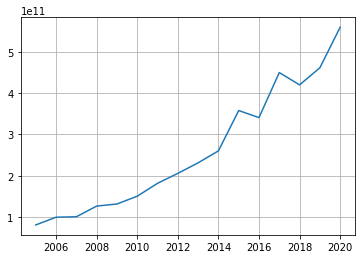

In [ ]:
t['GC.XPN.INTP.CN'].plot(grid='on')

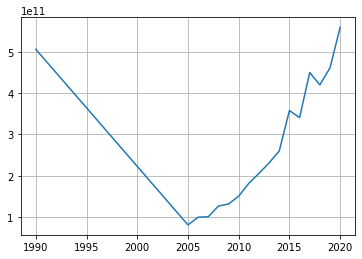

In [ ]:
t['GC.XPN.INTP.CN1'].plot(grid='on')

**Visualize Mising values In Major Regions Data 1990-2020**

In [ ]:
datamr1 = data.loc[['EAS', 'ECS', 'EUU', 'LCN', 'MEA', 'NAC', 'SAS'],:,:]

<Figure size 2160x1296 with 0 Axes>

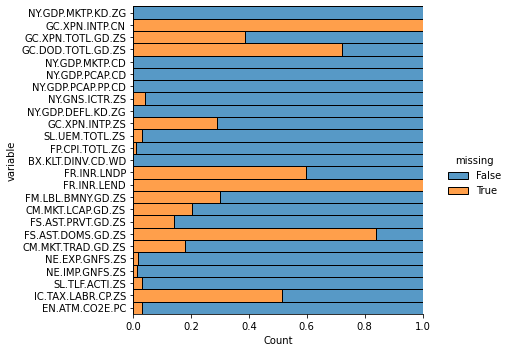

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=datamr1.iloc[:,0:25].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

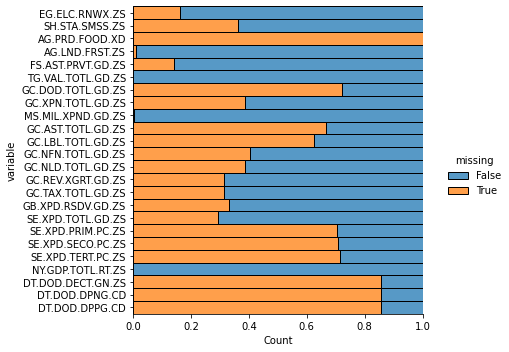

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=datamr1.iloc[:,25:50].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

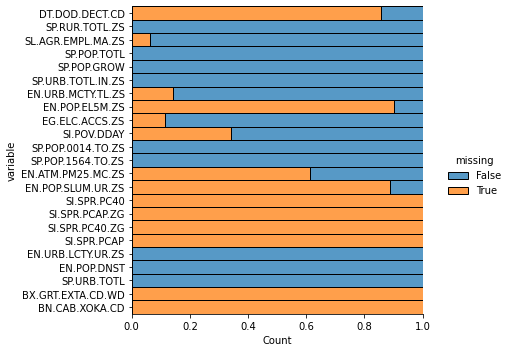

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=datamr1.iloc[:,50:75].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

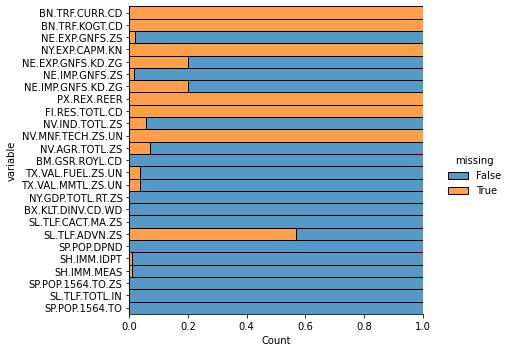

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=datamr1.iloc[:,75:].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

**Drop Indicators with more than 20% missing values (Major Regions)**

In [ ]:
drop_list_region= calculate_quality(datamr1 ,0.2)

There are 47 columns with missing value rate larger than 20.0%


In [ ]:
datamr1_d = datamr1.drop(drop_list_region, axis=1)
na_columns = datamr1_d.columns[datamr1_d.isnull().any()]

<Figure size 2160x1296 with 0 Axes>

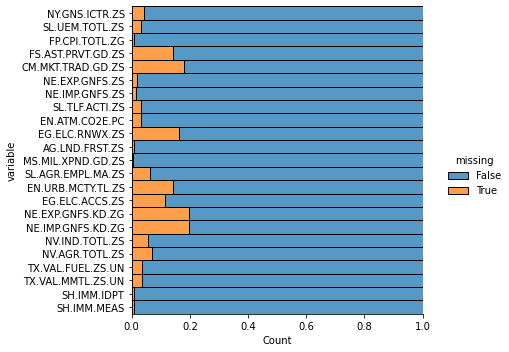

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=datamr1_d.loc[:,na_columns].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

## missing value filling function

**Only used when a column follows normal distribution**

In [ ]:
def filling_mean(series):
  series.fillna(series.mean(numeric_only=True).round(1), inplace=True)
  return series

**used when a column doesn't follow a normal distribution**

In [ ]:
def filling_median(series):
  series.fillna(series.median(numeric_only=True).round(1), inplace = True)
  return series

In [ ]:
def filling_link(series):
  front = 0
  back = 0
  step = 0
  for i in range(len(series)):
    if ele.isna() == True:
      i = 1
## ask teacher


**Missing Value Calculation :**


**7 contries 1990 - 2020 Missing Values**


In [ ]:
data7c = data.loc[['USA','CHN','JPN','DEU','GBR','IND','FRA'],:,:]
data7c

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
USA 1990           1.885965    1.963400e+11          21.558929   
    1991          -0.108265    2.189500e+11          22.884386   
    1992           3.522441    2.165600e+11          21.818384   
    1993           2.751781    2.109900e+11          21.417473   
    1994           4.028793    2.143200e+11          20.731454   
...                     ...             ...                ...   
FRA 2016           1.095464    4.055100e+10          47.881926   
    2017           2.291420    3.920100e+10          47.707991   
    2018           1.865066    3.959400e+10          46.773207   
    2019           1.842972    3.439900e+10          46.302461   
    2020          -7.855256    2.909400e+10          52.083279   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
USA 1990          40.933944    5.963144e+12  ...         90.0   
    1991          44.061597    6.158129e+12  ...         87.0   
    1992          46.050144    6.520327e+12  ...         83.0   
    1993          48.246140    6.858559e+12  ...         84.0   
    1994          47.353482    7.287236e+12  ...         89.0   
...                     ...             ...  ...          ...   
FRA 2016         102.262045    2.472964e+12  ...         90.0   
    2017         102.215265    2.595151e+12  ...         90.0   
    2018         101.622134    2.790957e+12  ...         90.0   
    2019         104.986432    2.728870e+12  ...         92.0   
    2020         123.420008    2.630318e+12  ...         92.0   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
USA 1990          65.697718          65.697718     127976617.0     163996615.0  
    1991          65.528463          65.528463     128888505.0     165774560.0  
    1992          65.394699          65.394699     131111933.0     167746558.0  
    1993          65.308229          65.308229     132441929.0     169748497.0  
    1994          65.283182          65.283182     134712595.0     171777026.0  
...                     ...                ...             ...             ...  
FRA 2016          62.470344          62.470344      30449775.0      41682778.0  
    2017          62.221177          62.221177      30490320.0      41637179.0  
    2018          62.008911          62.008911      30620365.0      41609176.0  
    2019          61.806472          61.806472      30551690.0      41564189.0  
    2020          61.592889          61.592889      30255910.0      41501232.0  

[217 rows x 101 columns]

In [ ]:
data7c1 = data.loc[['USA','CHN','JPN','DEU','GBR','IND','FRA'],:,:]


In [ ]:
c7_0_1 = calculate_quality(data7c1 ,0)
c7_1_1 = calculate_quality(data7c1 ,0.1)
c7_2_1 = calculate_quality(data7c1 ,0.2)

There are 62 columns with missing value rate larger than 0%
There are 46 columns with missing value rate larger than 10.0%
There are 33 columns with missing value rate larger than 20.0%


**Major Regions 1990 - 2020 Missing Values**

In [ ]:
datamr1 = data.loc[['EAS', 'ECS', 'EUU', 'LCN', 'MEA', 'NAC', 'SAS'],:,:]
datamr1

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
EAS 1990           5.073856             NaN                NaN   
    1991           4.852352             NaN                NaN   
    1992           4.239459             NaN                NaN   
    1993           4.204069             NaN                NaN   
    1994           5.242282             NaN                NaN   
...                     ...             ...                ...   
SAS 2016           7.671464             NaN          14.969130   
    2017           6.444783             NaN          15.228649   
    2018           6.373259             NaN          15.084180   
    2019           3.913844             NaN                NaN   
    2020          -5.239833             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
EAS 1990                NaN    4.737130e+12  ...    89.443706   
    1991                NaN    5.348104e+12  ...    86.002801   
    1992                NaN    5.843647e+12  ...    82.309655   
    1993                NaN    6.534963e+12  ...    78.760137   
    1994                NaN    7.402443e+12  ...    76.086656   
...                     ...             ...  ...          ...   
SAS 2016          47.680245    3.005244e+12  ...    85.911757   
    2017          47.630590    3.426791e+12  ...    87.651222   
    2018          46.570323    3.527313e+12  ...    90.331850   
    2019                NaN    3.648732e+12  ...    91.801738   
    2020                NaN    3.482474e+12  ...    87.934961   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
EAS 1990          64.541138          64.541138    9.567345e+08    1.175914e+09  
    1991          64.636212          64.636212    9.709855e+08    1.194534e+09  
    1992          64.879720          64.879720    9.873982e+08    1.214870e+09  
    1993          65.189117          65.189117    1.002630e+09    1.235991e+09  
    1994          65.459612          65.459612    1.019934e+09    1.256427e+09  
...                     ...                ...             ...             ...  
SAS 2016          65.206465          65.206465    6.341835e+08    1.154929e+09  
    2017          65.489050          65.489050    6.422090e+08    1.174142e+09  
    2018          65.743078          65.743078    6.469488e+08    1.192879e+09  
    2019          65.999231          65.999231    6.598482e+08    1.211599e+09  
    2020          66.268692          66.268692    6.321568e+08    1.230532e+09  

[217 rows x 101 columns]

In [ ]:
mr_0_1 = calculate_quality(datamr1,0)
mr_1_1 = calculate_quality(datamr1,0.1)
mr_2_1 = calculate_quality(datamr1,0.2)

There are 74 columns with missing value rate larger than 0%
There are 56 columns with missing value rate larger than 10.0%
There are 47 columns with missing value rate larger than 20.0%


**7 contries 2000 - 2020 Missing Values**


In [ ]:
data7c2 = data7c.loc[:, [str(i) for i in range(2000, 2021)], :]
data7c2

,,NY.GDP.MKTP.KD.ZG,GC.XPN.INTP.CN,GC.XPN.TOTL.GD.ZS,GC.DOD.TOTL.GD.ZS,NY.GDP.MKTP.CD,...,SH.IMM.MEAS,SP.POP.1564.TO.ZS,SP.POP.1564.TO.ZS,SL.TLF.TOTL.IN,SP.POP.1564.TO
USA,2000,4.077159,2.363600e+11,17.926537,33.267655,1.025095e+13,...,91.0,65.963381,65.963381,146013784.0,186123865.0
CHN,2000,8.490093,NaN,NaN,NaN,1.211347e+12,...,84.0,68.399426,68.399426,729522246.0,863641938.0
JPN,2000,2.764648,1.089000e+13,17.109558,98.933823,4.968359e+12,...,96.0,68.231677,68.231677,67491823.0,86547107.0
DEU,2000,2.912503,4.487400e+10,31.313220,NaN,1.947982e+12,...,92.0,67.839212,67.839212,39835215.0,55771639.0
GBR,2000,3.672369,2.643900e+10,34.197451,86.528084,1.662127e+12,...,88.0,65.074463,65.074463,29521079.0,38323987.0
...,...,...,...,...,...,...,...,...,...,...,...,...
JPN,2020,-4.506905,7.550100e+12,23.683438,216.278885,5.040108e+12,...,98.0,59.154170,59.154170,68536863.0,74688647.0
DEU,2020,-4.569617,1.066400e+10,32.937646,NaN,3.846414e+12,...,97.0,64.356955,64.356955,44078049.0,53519804.0
GBR,2020,-9.270411,4.149700e+10,47.207681,190.772519,2.756900e+12,...,91.0,63.669378,63.669378,34679986.0,42710056.0
IND,2020,-6.596081,NaN,NaN,NaN,2.667688e+12,...,89.0,67.265500,67.265500,457779812.0,928266848.0


In [ ]:
c7_0_2 = calculate_quality(data7c2, 0)
c7_1_2 = calculate_quality(data7c2, 0.1)
c7_2_2 = calculate_quality(data7c2, 0.2)

There are 51 columns with missing value rate larger than 0%


**Major Regions 2000 - 2020 Missing Values**

In [ ]:
datamr2 = datamr.loc[:, [str(i) for i in range(2000, 2021)],:]
datamr2

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
EAS 2000           5.393371             NaN                NaN   
    2001           3.305056             NaN                NaN   
    2002           4.381905             NaN                NaN   
    2003           4.948190             NaN                NaN   
    2004           5.868820             NaN                NaN   
...                     ...             ...                ...   
SAS 2016           7.671464             NaN          14.969130   
    2017           6.444783             NaN          15.228649   
    2018           6.373259             NaN          15.084180   
    2019           3.913844             NaN                NaN   
    2020          -5.239833             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
EAS 2000                NaN    8.373137e+12  ...    83.748145   
    2001                NaN    7.787012e+12  ...    84.345175   
    2002                NaN    7.909583e+12  ...    83.962553   
    2003                NaN    8.696263e+12  ...    84.599973   
    2004                NaN    9.753488e+12  ...    86.375288   
...                     ...             ...  ...          ...   
SAS 2016          47.680245    3.005244e+12  ...    85.911757   
    2017          47.630590    3.426791e+12  ...    87.651222   
    2018          46.570323    3.527313e+12  ...    90.331850   
    2019                NaN    3.648732e+12  ...    91.801738   
    2020                NaN    3.482474e+12  ...    87.934961   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
EAS 2000          67.138905          67.138905    1.108825e+09    1.374626e+09  
    2001          67.489517          67.489517    1.120334e+09    1.394134e+09  
    2002          68.037263          68.037263    1.131903e+09    1.417200e+09  
    2003          68.690514          68.690514    1.145787e+09    1.442083e+09  
    2004          69.290921          69.290921    1.159528e+09    1.465675e+09  
...                     ...                ...             ...             ...  
SAS 2016          65.206465          65.206465    6.341835e+08    1.154929e+09  
    2017          65.489050          65.489050    6.422090e+08    1.174142e+09  
    2018          65.743078          65.743078    6.469488e+08    1.192879e+09  
    2019          65.999231          65.999231    6.598482e+08    1.211599e+09  
    2020          66.268692          66.268692    6.321568e+08    1.230532e+09  

[147 rows x 101 columns]

In [ ]:
mr_0_2 = calculate_quality(datamr2,0)
mr_1_2 = calculate_quality(datamr2,0.1)
mr_2_2 = calculate_quality(datamr2,0.2)

There are 59 columns with missing value rate larger than 0%
There are 51 columns with missing value rate larger than 10.0%
There are 43 columns with missing value rate larger than 20.0%


**7 contries 2010 - 2020 Missing Values**

In [ ]:
data7c3 = data7c.loc[:, [str(i) for i in range(2010, 2021)], :]
data7c3

,,NY.GDP.MKTP.KD.ZG,GC.XPN.INTP.CN,GC.XPN.TOTL.GD.ZS,GC.DOD.TOTL.GD.ZS,NY.GDP.MKTP.CD,...,SH.IMM.MEAS,SP.POP.1564.TO.ZS,SP.POP.1564.TO.ZS,SL.TLF.TOTL.IN,SP.POP.1564.TO
USA,2010,2.708857,3.814874e+11,26.054605,84.964411,1.504896e+13,...,92.0,66.813427,66.813427,157111093.0,206672064.0
CHN,2010,10.635871,1.508884e+11,NaN,NaN,6.087164e+12,...,99.0,73.265589,73.265589,772108526.0,980077454.0
JPN,2010,4.097918,8.435100e+12,17.221747,160.501461,5.759072e+12,...,94.0,64.147147,64.147147,66113861.0,82153251.0
DEU,2010,4.179882,3.739900e+10,31.366713,NaN,3.399668e+12,...,97.0,65.878867,65.878867,41963382.0,53873715.0
GBR,2010,2.131438,4.645400e+10,44.006215,129.072972,2.491110e+12,...,89.0,65.934771,65.934771,32288000.0,41384859.0
...,...,...,...,...,...,...,...,...,...,...,...,...
JPN,2020,-4.506905,7.550100e+12,23.683438,216.278885,5.040108e+12,...,98.0,59.154170,59.154170,68536863.0,74688647.0
DEU,2020,-4.569617,1.066400e+10,32.937646,NaN,3.846414e+12,...,97.0,64.356955,64.356955,44078049.0,53519804.0
GBR,2020,-9.270411,4.149700e+10,47.207681,190.772519,2.756900e+12,...,91.0,63.669378,63.669378,34679986.0,42710056.0
IND,2020,-6.596081,NaN,NaN,NaN,2.667688e+12,...,89.0,67.265500,67.265500,457779812.0,928266848.0


In [ ]:
c7_0_3 = calculate_quality(data7c3, 0)
c7_1_3 = calculate_quality(data7c3, 0.1)
c7_2_3 = calculate_quality(data7c3, 0.2)

There are 48 columns with missing value rate larger than 0%
There are 42 columns with missing value rate larger than 10.0%
There are 30 columns with missing value rate larger than 20.0%


**Major Regions 2010 - 2020 Missing Values**

In [ ]:
datamr3 = datamr.loc[:, [str(i) for i in range(2010, 2021)], :]
datamr3

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
EAS 2010           7.611402             NaN                NaN   
    2011           5.474092             NaN                NaN   
    2012           5.182544             NaN                NaN   
    2013           5.244842             NaN                NaN   
    2014           4.758385             NaN                NaN   
...                     ...             ...                ...   
SAS 2016           7.671464             NaN          14.969130   
    2017           6.444783             NaN          15.228649   
    2018           6.373259             NaN          15.084180   
    2019           3.913844             NaN                NaN   
    2020          -5.239833             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
EAS 2010                NaN    1.706333e+13  ...    93.657838   
    2011                NaN    1.978870e+13  ...    93.871351   
    2012                NaN    2.117124e+13  ...    93.910562   
    2013                NaN    2.140982e+13  ...    94.711477   
    2014                NaN    2.208532e+13  ...    94.505024   
...                     ...             ...  ...          ...   
SAS 2016          47.680245    3.005244e+12  ...    85.911757   
    2017          47.630590    3.426791e+12  ...    87.651222   
    2018          46.570323    3.527313e+12  ...    90.331850   
    2019                NaN    3.648732e+12  ...    91.801738   
    2020                NaN    3.482474e+12  ...    87.934961   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
EAS 2010          70.752547          70.752547    1.206279e+09    1.561282e+09  
    2011          70.757121          70.757121    1.221032e+09    1.572487e+09  
    2012          70.736908          70.736908    1.230782e+09    1.584583e+09  
    2013          70.680416          70.680416    1.238278e+09    1.595751e+09  
    2014          70.569490          70.569490    1.249125e+09    1.605363e+09  
...                     ...                ...             ...             ...  
SAS 2016          65.206465          65.206465    6.341835e+08    1.154929e+09  
    2017          65.489050          65.489050    6.422090e+08    1.174142e+09  
    2018          65.743078          65.743078    6.469488e+08    1.192879e+09  
    2019          65.999231          65.999231    6.598482e+08    1.211599e+09  
    2020          66.268692          66.268692    6.321568e+08    1.230532e+09  

[77 rows x 101 columns]

In [ ]:
mr_0_3 = calculate_quality(datamr3,0)
mr_1_3 = calculate_quality(datamr3,0.1)
mr_2_3 = calculate_quality(datamr3,0.2)

There are 57 columns with missing value rate larger than 0%
There are 50 columns with missing value rate larger than 10.0%
There are 40 columns with missing value rate larger than 20.0%


## Countries choosen

**Modules required**

In [ ]:
!pip install world_bank_data --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=2fb9a76e85c8de12f52ff043633a4d209e4fe0107ca96988e755450221e4ecc3
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [ ]:
import os
import json
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

import world_bank_data as wb

### East Asia & Pacific

In [ ]:
countries = wb.get_countries()
EAP = countries[countries['region'] == 'East Asia & Pacific']
#############################
#check for lan and lat
#############################
EAP.dropna(subset = ['longitude','latitude'])

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ASM,AS,American Samoa,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,Not classified,Pago Pago,-170.691000,-14.284600
AUS,AU,Australia,East Asia & Pacific,,High income,Not classified,Canberra,149.129000,-35.282000
BRN,BN,Brunei Darussalam,East Asia & Pacific,,High income,Not classified,Bandar Seri Begawan,114.946000,4.941990
CHN,CN,China,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IBRD,Beijing,116.286000,40.049500
FJI,FJ,Fiji,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,Blend,Suva,178.399000,-18.114900
...,...,...,...,...,...,...,...,...,...
TON,TO,Tonga,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IDA,Nuku'alofa,-175.216000,-21.136000
TUV,TV,Tuvalu,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IDA,Funafuti,179.089567,-8.631488
VNM,VN,Vietnam,East Asia & Pacific,East Asia & Pacific (excluding high income),Lower middle income,IBRD,Hanoi,105.825000,21.006900


In [ ]:
#############
#check for missing value
#############
data

NameError: ignored